# HW04: Problem 3: Feature Selection

## Description

In this problem we will work with the diabetes dataset from sklearn. This data set is for a regression problem where 10 features are used to predict the progression of diabetes. The dataset is described in more detail [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). You task here is to use multiple techniques of feature selection to try to interpret the strength of the features in the dataset. You will need to use the following techniques:

- Pearson correlation coefficient using r_regression from sklearn (univariate feature selection)
- Mutual information using mutual_info_regression from sklearn (univariate feature selection)
- Random forest feature importance using RandomForestRegressor from sklearn (multivariate feature selection)
- Recursive feature elimination using sklearn.feature.selection.RFE with a Support Vector Regressor SVR (multivariate feature selection)

For each method you will need to plot the feature importance as a bar graph. The importance goes by different names in different algorithms. For example, in r_regression it is just the output (r value) and the mutual information in mutual_info_regression. In random variable it is called feature_importance_ and in RFE it is the ranking_. The bar graph will be sorted from most important features to least important features, with the y value being the importance of that feature, and the x value being the rank but labeled with the feature name.
You will also need to print out the top 5 features for each method. You will need to use the following code to load the data and split it into training and testing sets. You will need to use the training set for all of the feature selection methods.

* Are there 3 features that are selected in the top 5 by all 4 methods? 
* If so, what are they? 
* If not, what are the 3 features that are selected by the most methods? 
* How would it be possible that univariate methods might select different features than multivariate methods? 
* How does dependence between features affect the feature selection methods?

For good habits, make sure you split your code into training and testing. You may not even use the testing data but when you do any analysis such as feature selection, remember you must not use the testing data. You should also make sure you use the same random seed for all of your feature selection methods so that you can compare the results.

## Hints: In sorting features you use "arg" sort. This will return the indices of the sorted array. You can use these indices to sort the feature names.

This kind of code will be useful for plotting the bar graph:

```python
r_inds = np.argsort(np.abs(r_importance))[::-1]
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, r_importance[r_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[r_inds])
```

In [2]:
# Some imports you will need
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import corrcoef
import seaborn as sns
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pandas as pd
import random

## Loading and preparing the data

In [3]:
# Load the diabetes data set as X, y
X, y = load_diabetes(return_X_y=True)
# Load the diabetes data set as data to read the description
data = load_diabetes()

In [4]:
# Print out the DESCR attribute to inpect the variables
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
# Print the array of feature names
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
# Split the Data into train/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Check the shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [ ]:
# Do a pair plot 
sns.pairplot(data=pd.DataFrame(X_train, columns=data.feature_names))
plt.show()

Q: What does the EDA tell you about the data?

A Here: From the pair plot, we can see that some features have a stronger correlation with the target variable than others. The relationship between some of the features also suggests that there may be collinearity between them.

## Univariate feature selection with r_regression

In [9]:
# Use r_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

r_importance = r_regression(X_train, y_train)

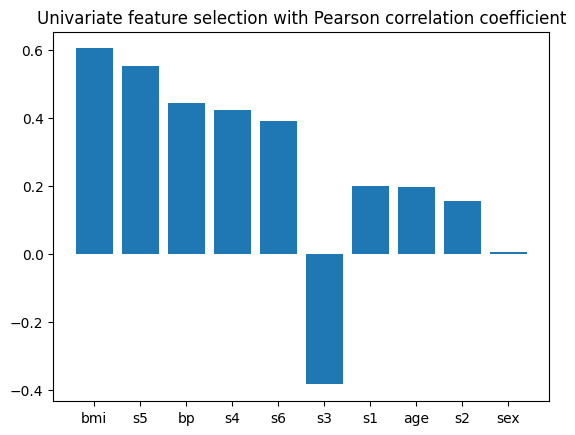

In [10]:
r_inds = np.argsort(np.abs(r_importance))[::-1]
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, r_importance[r_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[r_inds])
plt.title("Univariate feature selection with Pearson correlation coefficient")
plt.show()


In [11]:
# print the top 5 features according to r_regression?
print("Top 5 features according to r_regression:")
print(np.array(data.feature_names)[r_inds[:5]])

Top 5 features according to r_regression:
['bmi' 's5' 'bp' 's4' 's6']


## Univariate feature selection with mutual information using mutual_info_regression

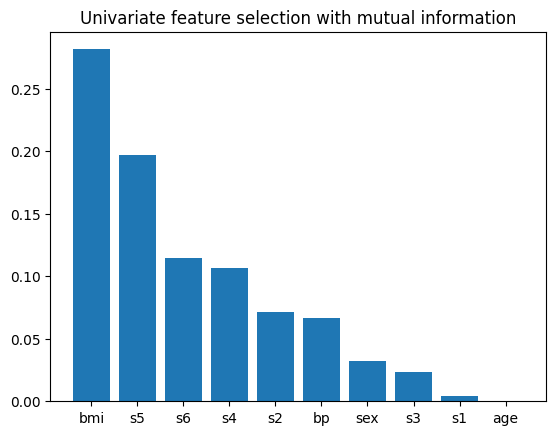

In [12]:
# Use mutual_info_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
mi_importance = mutual_info_regression(X_train, y_train)

mi_inds = np.argsort(np.abs(mi_importance))[::-1]
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, mi_importance[mi_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[mi_inds])
plt.title("Univariate feature selection with mutual information")
plt.show()

In [13]:
# What are the top 5 features according to mutual_info_regression?
print("Top 5 features according to mutual_info_regression:")
print(np.array(data.feature_names)[mi_inds[:5]])

Top 5 features according to mutual_info_regression:
['bmi' 's5' 's6' 's4' 's2']


## Multivariate feature selection with Random Forest feature_importance_

In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_
rf_importance

array([0.05864167, 0.00963304, 0.35546898, 0.08840759, 0.05278353,
       0.05722749, 0.05133862, 0.02421276, 0.23095698, 0.07132935])

<BarContainer object of 10 artists>

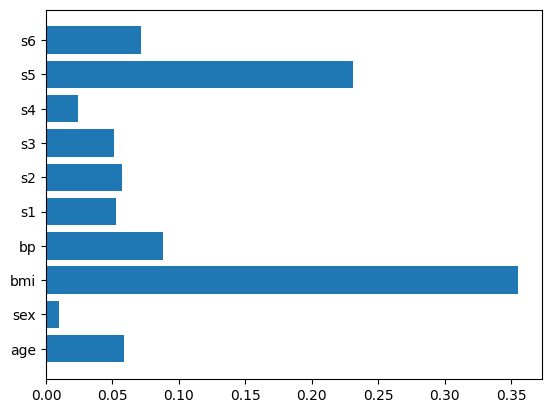

In [22]:
plt.barh(data.feature_names, rf.feature_importances_)

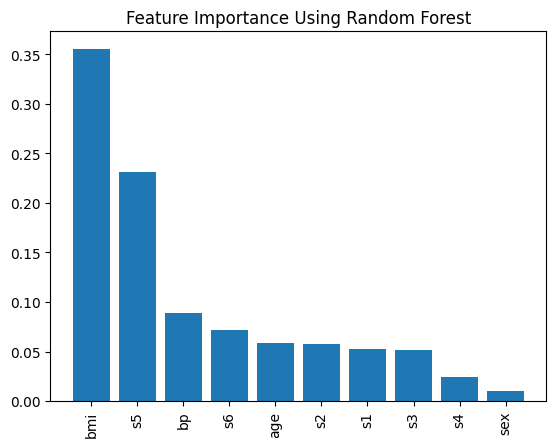

In [15]:
rf_inds = np.argsort(np.abs(rf_importance))[::-1]

fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, rf_importance[rf_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[rf_inds])
plt.xticks(rotation=90)
plt.title('Feature Importance Using Random Forest')
plt.show()

In [23]:
# What are the top 5 features according to random forest feature_importance_?
print("Top 5 features according to Random forest:")
print(np.array(data.feature_names)[rf_inds[:5]])

Top 5 features according to Random forest:
['bmi' 's5' 'bp' 's6' 'age']


## Multivariate feature selection with recursive feature elimination (RFE) using a support vector regressor

In [24]:
# Use recursive feature elimination (RFE) with a support vector regressor 
# to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)
rfe_importance = selector.ranking_
rfe_importance

array([ 8, 10,  1,  3,  7,  9,  6,  4,  2,  5])

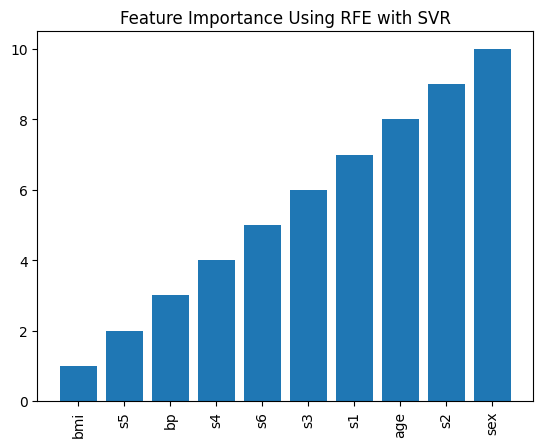

In [25]:
rfe_inds = np.argsort(rfe_importance)
#rfe_top5_features = data.feature_names[rfe_inds][:5]

fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, rfe_importance[rfe_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[rfe_inds])
plt.xticks(rotation=90)
plt.title('Feature Importance Using RFE with SVR')
plt.show()

In [26]:
# What are the top 5 features according to RFE with SVR?
print("Top 5 features according to RFE with SVR:")
print(np.array(data.feature_names)[rfe_inds[:5]])

Top 5 features according to RFE with SVR:
['bmi' 's5' 'bp' 's4' 's6']


## Conclusions

#### Q1: Are there 3 features that are selected in the top 5 by all 4 methods?

A1: Yes, thre is 3 features.

#### Q2: If so, what are they? / If not, what are the 3 features that are selected by the most methods? 

A2: They are bmi,s5 & s6

#### Q3: How would it be possible that univariate methods might select different features than multivariate methods?

A3: There are several reasons why univariate and multivariate methods might select different features:

##### Correlation between features:
Univariate methods do not consider the correlation between features, so they might select two highly correlated features separately. On the other hand, multivariate methods can detect the correlation between features and only select one of them.

##### Overfitting:
Univariate methods can be prone to overfitting because they select features based solely on their individual correlation with the target variable, without considering the relationship between features. Multivariate methods can help to prevent overfitting by selecting features that have a strong relationship with the target variable while minimizing the overlap between selected features.

#### Q4: How does dependence between features affect the feature selection methods?

A4: If features are highly correlated, selecting one feature may be enough to represent the information contained in the other features. In this case, feature selection methods that take into account the correlation between features, such as principal component analysis (PCA) or linear discriminant analysis (LDA), can be used to reduce the dimensionality of the dataset and select the most informative features.